## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter-archive_enhanced.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
df_1= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [7]:
df_2 = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'EYjxiBLyBAiyAthnMVjEpnZZt'
consumer_secret = 'KiNGQzB0IkvRBe2WQyMd8PM4IXdiWbkWoFdLpRL8k18A54ZCSj'
access_token = '828264292919214080-FEMv96lpDVH4u5ZuVJHC9WOiXzpXjlW'
access_secret = 'hTHNbpn8yTCNINyw2YTKOc7w2fFlntsVhimFtHwB72q4r'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit= True)

Query Twitter's API for JSON data for each tweet ID in the Twitter archive

In [8]:
tweet_id = df_1.tweet_id.values
len(tweet_id)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Rate limit reached. Sleeping for: 269


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 254


Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
1832: 676215927814406144
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

I convert the txt file to a data list

In [9]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

Set them line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.

In [10]:
df_3 = pd.DataFrame(df_list, columns = ['id',
                                        'retweet_count',
                                        'favorite_count'])
                

In [11]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7002,33804
1,892177421306343426,5300,29318
2,891815181378084864,3477,22044
3,891689557279858688,7224,36926
4,891327558926688256,7756,35308


## Assessing twitter archive enhanced (df_1)

In [12]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
601,798665375516884993,NaN,NaN,2016-11-15 23:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lola. She fell asleep o...,6.718968e+17,4.196984e+09,2015-12-02 03:40:57 +0000,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
205,852912242202992640,NaN,NaN,2017-04-14 15:51:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,NaN,NaN,NaN,"https://www.gofundme.com/bennys-medical-bills,...",12,10,Benny,None,None,None,None
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
2023,671896809300709376,NaN,NaN,2015-12-02 03:40:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She fell asleep on a piece of pi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,None,None,None,None


In [16]:
df_1.duplicated().sum()

0

In [17]:
df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
df_1.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [19]:
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## Assessing Image predictions (df_2)

In [20]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_greyhound,0.399560,True,whippet,0.267153,True,German_short-haired_pointer,0.081319,True
313,671561002136281088,https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg,1,Gordon_setter,0.469373,True,black-and-tan_coonhound,0.270893,True,Rottweiler,0.153233,True
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
902,700029284593901568,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,West_Highland_white_terrier,0.726571,True,Maltese_dog,0.176828,True,Dandie_Dinmont,0.070134,True


In [25]:
df_2.duplicated().sum()

0

## Assessing tweet_json.txt (df_3)

In [26]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,7002,33804
1,892177421306343426,5300,29318
2,891815181378084864,3477,22044
3,891689557279858688,7224,36926
4,891327558926688256,7756,35308


In [27]:
df_3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [28]:
df_3.sample(5)

,id,retweet_count,favorite_count
923,751950017322246144,832,2852
1040,740373189193256964,12138,32543
527,805823200554876929,7480,0
946,750056684286914561,819,2956
865,759447681597108224,2275,7946


In [29]:
df_3.duplicated().sum()

0

In [30]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.418123e+17,2470.631556,7053.941960
std,6.821626e+16,4183.802070,10961.317265
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,493.250000,1223.500000
50%,7.180382e+17,1149.000000,3051.000000
75%,7.986600e+17,2860.000000,8605.750000
max,8.924206e+17,70698.000000,144827.000000


In [31]:
df_3.nunique()

id                2326
retweet_count     1654
favorite_count    1982
dtype: int64

In [32]:
all_columns = pd.Series(list(df_1) + list(df_2) + list(df_3))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues
#### `df_1` Table
1. Dropping all retweeted columns

2. Tweet_id is a string not an int for all datasets

3. Timestamp is a datetime not an object

4. Replacing the None in name column to Nan

5. Drop columns that are irrelevant to our analysis - source and expanded urls

6. Drop incomplete columns- in_reply_to_status_id and in_reply_to user_id


#### `df_2` Table
7. Changing p1,p2 and p3 names to lower case

8. Removing "_" from p1, p2 and p3 columns

#### `df_3` Table
9. Change id to tweet_id 



### Tidiness issues

1. Merge floofer, pupper, puppo and doggo into dog_stage column

2. The three datasets (df_1, df_2, df_3) should be merged to form a single table

## Cleaning Data

In [33]:
clean_df_1 = df_1.copy()
clean_df_2 = df_2.copy()
clean_df_3 = df_3.copy()

 ### Quality Issue 1 : Dropping all retweeted columns

#### Define

Drop the retweeted columns: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp 

#### Code

In [34]:
clean_df_1.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test

In [35]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  doggo                  2356 non-null   object 
 11  floofer                2356 non-null   object 
 12  pupper                 2356 non-null   object 
 13  puppo                  2356 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 257.8+ 

### Issue 2: Tweet_id is a string not an int

#### Define

Convert int datatype to float in tweet_id for all 3 datasets

#### Code

In [36]:
clean_df_1.tweet_id = clean_df_1.tweet_id.astype(str)

In [37]:
clean_df_2.tweet_id = clean_df_2.tweet_id.astype(str)

In [38]:
clean_df_3.id = clean_df_3.id.astype(str)

#### Test

In [39]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  doggo                  2356 non-null   object 
 11  floofer                2356 non-null   object 
 12  pupper                 2356 non-null   object 
 13  puppo                  2356 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 257.8+

In [40]:
clean_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [41]:
clean_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 3: Convert the timestamp column to a datetime datatype

#### Define

Convert timestamp (object) to datetime

#### Code

In [42]:
clean_df_1['timestamp'] = pd.to_datetime(clean_df_1['timestamp'])

#### Test

In [43]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   source                 2356 non-null   object             
 5   text                   2356 non-null   object             
 6   expanded_urls          2297 non-null   object             
 7   rating_numerator       2356 non-null   int64              
 8   rating_denominator     2356 non-null   int64              
 9   name                   2356 non-null   object             
 10  doggo                  2356 non-null   object             
 11  floofer                2356 non-null   object           

### Issue 4

#### Define

Replace None values in the name column to Nan using pandas replace function

#### Code

In [44]:
clean_df_1.name = clean_df_1.name.replace('None', value = np.nan)

#### Test

In [45]:
clean_df_1.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           a
2353           a
2354           a
2355         NaN
Name: name, Length: 2356, dtype: object

### Issue 5 : Dropping more columns

#### Define

Drop irrlevant columns to our analysis- (source, expanded urls, in reply to status id and in reply to status id)

#### Code

In [46]:
clean_df_1.drop(columns = ['source', 'expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [47]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                1611 non-null   object             
 6   doggo               2356 non-null   object             
 7   floofer             2356 non-null   object             
 8   pupper              2356 non-null   object             
 9   puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 184.2+ KB


### Issue 6 - Image Prediction Issues

#### Define

Remove Underscore from the p1, p2, and p3 columns in df_2 by using the strip function

#### Code

In [48]:
clean_df_2['p1']= clean_df_2.p1.str.replace('_', ' ')
clean_df_2['p2']= clean_df_2.p2.str.replace('_',' ')
clean_df_2['p3']= clean_df_2.p3.str.replace('_',' ')

#### Test

In [49]:
clean_df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue 7

#### Define

Change p1, p2 and p3 names to lowercase

#### Code

In [50]:
clean_df_2['p1'] = clean_df_2['p1'].str.lower()
clean_df_2['p2'] = clean_df_2['p2'].str.lower()
clean_df_2['p3'] = clean_df_2['p3'].str.lower()

#### Test

In [51]:
clean_df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue 8 - Tweet_json.txt

#### Define

Rename id to tweet_id easy merging of the three dataframes

#### Code

In [52]:
clean_df_3 = clean_df_3.rename(columns = {'id':'tweet_id'})

#### Test

In [53]:
clean_df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7002,33804
1,892177421306343426,5300,29318
2,891815181378084864,3477,22044
3,891689557279858688,7224,36926
4,891327558926688256,7756,35308


## Tidiness issue

#### Define

Merge floofer, pupper, puppo and doggo into dog_stage column

#### Code

In [54]:
clean_df_1['dog_stage'] = clean_df_1['text'].str.extract('(doggo|floofer|pupper|puppo|multiple)')

In [55]:
clean_df_1 = clean_df_1.drop(columns = ['doggo', 'floofer','pupper', 'puppo'])

#### Test

In [56]:
clean_df_1.dog_stage.value_counts()

pupper      265
doggo        93
puppo        37
floofer       4
multiple      3
Name: dog_stage, dtype: int64

### Tidiness Issue 2

#### Define

Merge all dataframes into one

#### Code

In [57]:
df = pd.merge(clean_df_1, clean_df_2, how= 'left', on = ['tweet_id'])

In [58]:
twitter_archive = pd.merge(df, clean_df_3, how = 'left', on = ['tweet_id'])

#### Test

In [59]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   rating_numerator    2356 non-null   int64              
 4   rating_denominator  2356 non-null   int64              
 5   name                1611 non-null   object             
 6   dog_stage           402 non-null    object             
 7   jpg_url             2075 non-null   object             
 8   img_num             2075 non-null   float64            
 9   p1                  2075 non-null   object             
 10  p1_conf             2075 non-null   float64            
 11  p1_dog              2075 non-null   object             
 12  p2                  2075 non-null 

## Storing Data

In [60]:
twitter_archive.to_csv('twitter_master_archive.csv', index= False)

## Analyzing and Visualizing Data

In [61]:
df= pd.read_csv('twitter_master_archive.csv')

### Insights
 
 - Pupper has the largest number in the dog_stage column (265)
 
 - Floofer has the least number in the dog_stage column
 
 - There is a positive relationship between favorite count and retweet count

### Visualization

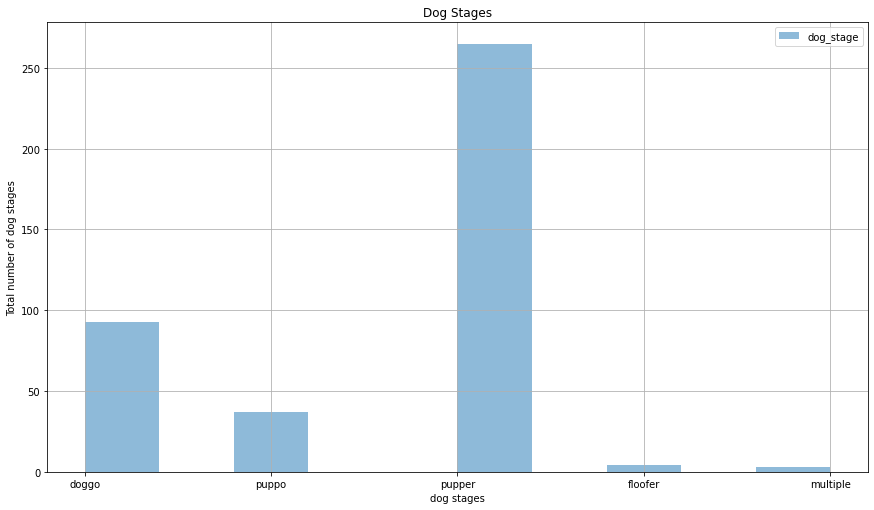

In [62]:
plt.figure(figsize= [14.70, 8.27])
df.dog_stage.hist(alpha= 0.5, label= 'dog_stage')
plt.legend()
plt.title('Dog Stages')
plt.xlabel('dog stages')
plt.ylabel('Total number of dog stages');

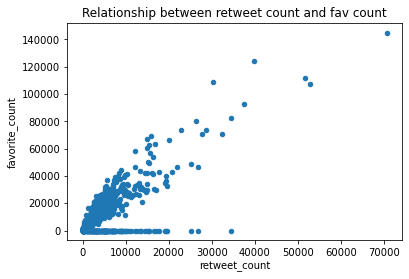

In [63]:
df.plot.scatter(x = 'retweet_count', y = 'favorite_count', title= 'Relationship between retweet count and fav count');